## Time series homework

### Import the dataset

In [10]:
import pandas as pd

ori_df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
ori_df = ori_df.drop_duplicates(subset='date_time', keep='first')
ori_df = ori_df.set_index('date_time')
ori_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [11]:
# control the time from 2017-09-30 23:00:00 to 2018-09-30 23:00:00
df = ori_df.loc['2017-08-30 23:00:00':'2018-09-30 23:00:00']
# add a new feature which is the colck
df.insert(2, 'time', [df.index.values[ind].split(' ')[1][:2] for ind in range(len(df.index))])
df.drop('weather_description', axis=1)

,holiday,temp,time,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume
date_time,,,,,,,,
2017-08-30 23:00:00,None,290.15,23,0.0,0.0,1,Clear,1204
2017-08-31 00:00:00,None,289.23,00,0.0,0.0,1,Clear,705
2017-08-31 01:00:00,None,288.22,01,0.0,0.0,20,Clouds,413
2017-08-31 02:00:00,None,287.59,02,0.0,0.0,1,Clear,282
2017-08-31 03:00:00,None,286.75,03,0.0,0.0,1,Clear,317
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,19,0.0,0.0,75,Clouds,3543
2018-09-30 20:00:00,None,282.76,20,0.0,0.0,90,Clouds,2781
2018-09-30 21:00:00,None,282.73,21,0.0,0.0,90,Thunderstorm,2159


In [12]:
df.head(5)

,holiday,temp,time,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,,
2017-08-30 23:00:00,None,290.15,23,0.0,0.0,1,Clear,sky is clear,1204
2017-08-31 00:00:00,None,289.23,00,0.0,0.0,1,Clear,sky is clear,705
2017-08-31 01:00:00,None,288.22,01,0.0,0.0,20,Clouds,few clouds,413
2017-08-31 02:00:00,None,287.59,02,0.0,0.0,1,Clear,sky is clear,282
2017-08-31 03:00:00,None,286.75,03,0.0,0.0,1,Clear,sky is clear,317


Attribute Information:  

holiday Categorical US National holidays plus regional holiday, Minnesota State Fair  
temp Numeric Average temp in kelvin  
rain_1h Numeric Amount in mm of rain that occurred in the hour  
snow_1h Numeric Amount in mm of snow that occurred in the hour  
clouds_all Numeric Percentage of cloud cover  
weather_main Categorical Short textual description of the current weather  
weather_description Categorical Longer textual description of the current weather  
date_time DateTime Hour of the data collected in local CST time  
traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume  

### Data preprocessing

In [13]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,9474.000000,9474.000000,9474.0,9474.000000,9474.000000
mean,281.573111,0.045253,0.0,41.644184,3334.989867
std,13.513885,0.342032,0.0,38.847209,1984.207673
min,246.150000,0.000000,0.0,0.000000,151.000000
25%,271.282500,0.000000,0.0,1.000000,1303.250000
50%,283.505000,0.000000,0.0,40.000000,3512.500000
75%,293.090000,0.000000,0.0,90.000000,4977.000000
max,310.070000,10.600000,0.0,92.000000,7213.000000


In [14]:
### check the number of nan values
import numpy as np

print(f'The number of nan value is shown in below: \n{np.sum(pd.isna(df), axis=0)}')
print('------------------------------------------')

The number of nan value is shown in below: 
holiday                0
temp                   0
time                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64
------------------------------------------


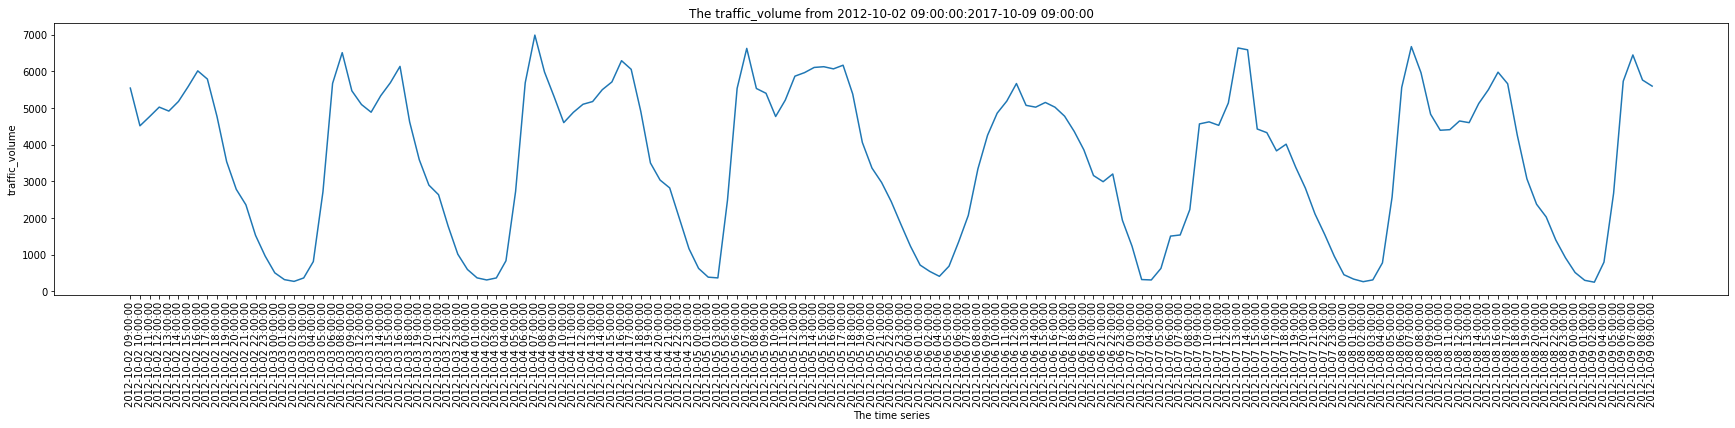

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))
plt.plot(ori_df.loc['2012-10-02 09:00:00':'2012-10-09 09:00:00']['traffic_volume'])
plt.title('The traffic_volume from 2012-10-02 09:00:00:2017-10-09 09:00:00')
plt.xlabel('The time series')
plt.ylabel('traffic_volume')
plt.xticks(rotation=90)
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# process the quarter element to correspond number
df.loc[df.loc[:, 'holiday'] != 'None', 'holiday'] = 1
df.loc[df.loc[:, 'holiday'] == 'None', 'holiday'] = 0

# process the weather with one hot encoding
df = pd.concat([df, pd.get_dummies(df.weather_main)], axis=1)
df = df.drop(['weather_main', 'weather_description'], axis=1)
df.head(5)

c:\Users\mljgs\anaconda3\envs\Jerry\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,holiday,temp,time,rain_1h,snow_1h,clouds_all,traffic_volume,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm
date_time,,,,,,,,,,,,,,,,,
2017-08-30 23:00:00,0,290.15,23,0.0,0.0,1,1204,1,0,0,0,0,0,0,0,0,0
2017-08-31 00:00:00,0,289.23,00,0.0,0.0,1,705,1,0,0,0,0,0,0,0,0,0
2017-08-31 01:00:00,0,288.22,01,0.0,0.0,20,413,0,1,0,0,0,0,0,0,0,0
2017-08-31 02:00:00,0,287.59,02,0.0,0.0,1,282,1,0,0,0,0,0,0,0,0,0
2017-08-31 03:00:00,0,286.75,03,0.0,0.0,1,317,1,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn import preprocessing

# 對數據進行標準化
z_scaler_traffic_volume = preprocessing.StandardScaler()
df.loc[:,'traffic_volume'] = z_scaler_traffic_volume.fit_transform(np.reshape(np.array(df.loc[:, 'traffic_volume']), (-1, 1)))
z_scaler_rain_1h = preprocessing.StandardScaler()
df.loc[:,'rain_1h'] = z_scaler_rain_1h.fit_transform(np.reshape(np.array(df.loc[:, 'rain_1h']), (-1, 1)))
df.loc[:,'clouds_all'] = df.loc[:,'clouds_all'] / 100

In [18]:
df.head(5)

,holiday,temp,time,rain_1h,snow_1h,clouds_all,traffic_volume,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm
date_time,,,,,,,,,,,,,,,,,
2017-08-30 23:00:00,0,290.15,23,-0.132314,0.0,0.01,-1.074032,1,0,0,0,0,0,0,0,0,0
2017-08-31 00:00:00,0,289.23,00,-0.132314,0.0,0.01,-1.325531,1,0,0,0,0,0,0,0,0,0
2017-08-31 01:00:00,0,288.22,01,-0.132314,0.0,0.20,-1.472701,0,1,0,0,0,0,0,0,0,0
2017-08-31 02:00:00,0,287.59,02,-0.132314,0.0,0.01,-1.538726,1,0,0,0,0,0,0,0,0,0
2017-08-31 03:00:00,0,286.75,03,-0.132314,0.0,0.01,-1.521085,1,0,0,0,0,0,0,0,0,0


In [19]:
# split the predict data
df = df[['holiday', 'temp', 'time', 'rain_1h', 'snow_1h', 'clouds_all', 'Clear',
        'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke',
        'Snow', 'Thunderstorm', 'traffic_volume']]
predict_df = df.loc['2018-08-30 23:00:00':'2018-09-30 23:00:00']
df = df.loc['2017-08-30 23:00:00':'2018-08-30 23:00:00']

In [25]:
n = int(df.shape[0] * 0.2) # 最後20%資料當作test data
time_step = 24 # 時間梯度
fin_pred = 24 # 最後想要預測的資料量

X_train, X_test, y_train, y_test = [], [], [], []

# training data
for i in range(0, df.shape[0] - n - time_step):
    X_train.append(np.array(df.iloc[i:i + time_step, :-1]))
    y_train.append(np.array(df.iloc[i + time_step:i + time_step + fin_pred, -1]))

# testing data
for i in range(df.shape[0] - n, df.shape[0] - time_step - fin_pred + 1):
    X_test.append(np.array(df.iloc[i:i + time_step, :-1]))
    y_test.append(np.array(df.iloc[i + time_step:i + time_step + fin_pred, -1]))

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 16))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 16))

print(f'The shape is {X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}')

The shape is (6960, 24, 16), (6960, 24), (1699, 24, 16), (1699, 24)


In [26]:
from keras import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM

LSTM_model = Sequential()
# inputshape=(timesteps時間點數量，輸入特徵)
LSTM_model.add(LSTM(256, input_shape=(X_train.shape[1], 16), activation='sigmoid', return_sequences = True))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(128, activation='sigmoid', return_sequences = True))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(64, activation='sigmoid', return_sequences = False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(256))
LSTM_model.add(Dense(128))
LSTM_model.add(Dense(64))
LSTM_model.add(Dense(24))
LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           279552    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 128)           197120    
                                                                 
 dropout_1 (Dropout)         (None, 24, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               1

In [49]:
LSTM_model.fit(X_train.astype('float64'), y_train.astype('float64'), epochs=30, batch_size=64)

Epoch 1/30
109/109 [==============================] - 9s 65ms/step - loss: 1.0139
Epoch 2/30
109/109 [==============================] - 7s 67ms/step - loss: 0.5406
Epoch 3/30
109/109 [==============================] - 7s 66ms/step - loss: 0.3590
Epoch 4/30
109/109 [==============================] - 7s 60ms/step - loss: 0.3262
Epoch 5/30
109/109 [==============================] - 7s 61ms/step - loss: 0.3026
Epoch 6/30
109/109 [==============================] - 6s 58ms/step - loss: 0.2964
Epoch 7/30
109/109 [==============================] - 6s 58ms/step - loss: 0.2930
Epoch 8/30
109/109 [==============================] - 6s 58ms/step - loss: 0.2890
Epoch 9/30
109/109 [==============================] - 6s 58ms/step - loss: 0.2906
Epoch 10/30
109/109 [==============================] - 6s 59ms/step - loss: 0.2834
Epoch 11/30
109/109 [==============================] - 6s 57ms/step - loss: 0.2790
Epoch 12/30
109/109 [==============================] - 6s 58ms/step - loss: 0.2787
Epoch 13/30
1

In [50]:
# preduct result
from sklearn import metrics

X_predict = predict_df.iloc[:24, :-1].values
X_predict = np.reshape(X_predict, (1, X_predict.shape[0], 16))
predict = z_scaler_traffic_volume.inverse_transform(LSTM_model.predict(X_predict.astype('float64')))
# actual result
actual = z_scaler_traffic_volume.inverse_transform(np.expand_dims(predict_df['traffic_volume'].values, axis=0))

In [51]:
print('MAE:', metrics.mean_absolute_error(actual[0][24:24*1+24], predict[0]))
print('RMSE:', metrics.mean_squared_error(actual[0][24:24*1+24], predict[0])**0.5)

MAE: 591.3383941650391
RMSE: 863.7153782132885


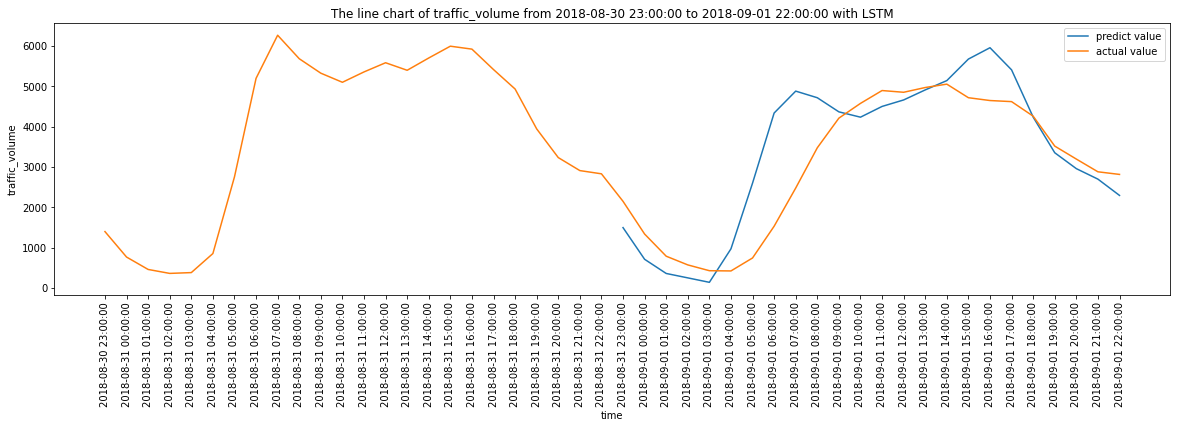

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(np.arange(24*1, 24*1+24, 1), predict[0], label='predict value')
plt.plot(actual[0][:24*1+24], label='actual value')
plt.xticks(np.arange(0, 24*1+24, 1), predict_df.iloc[:24*1+24].index, rotation='90')
plt.title('The line chart of traffic_volume from 2018-08-30 23:00:00 to 2018-09-01 22:00:00 with LSTM')
plt.xlabel('time')
plt.ylabel('traffic_volume')
plt.legend()
plt.show()

### Random forest

In [52]:
n = int(df.shape[0] * 0.2) # 最後20%資料當作test data
time_step = 24 * 1 # 時間梯度
fin_pred = 24 # 最後想要預測的資料量

X_train, X_test, y_train, y_test = [], [], [], []

# training data
for i in range(0, df.shape[0] - n - time_step):
    X_train.append(np.array(df.iloc[i:i + time_step, :-1]))
    y_train.append(np.array(df.iloc[i + time_step:i + time_step + fin_pred, -1]))

# testing data
for i in range(df.shape[0] - n, df.shape[0] - time_step - fin_pred + 1):
    X_test.append(np.array(df.iloc[i:i + time_step, :-1]))
    y_test.append(np.array(df.iloc[i + time_step:i + time_step + fin_pred, -1]))

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

print(f'The shape is {X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}')

The shape is (6960, 384), (6960, 24), (1699, 384), (1699, 24)


In [38]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, random_state=10)#隨機森林參數設定
# Create the model on train dataset
model = clf.fit(X_train, y_train)


In [55]:
from sklearn import metrics

X_predict = predict_df.iloc[:24 * 1, :-1].values
X_predict = np.reshape(X_predict, (1, X_predict.shape[0]*16))
predict = z_scaler_traffic_volume.inverse_transform(clf.predict(X_predict))

In [56]:
print('MAE:', metrics.mean_absolute_error(actual[0][24:24*1+24], predict[0]))
print('RMSE:', metrics.mean_squared_error(actual[0][24:24*1+24], predict[0])**0.5)

MAE: 608.3704166666666
RMSE: 892.0369342713153


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


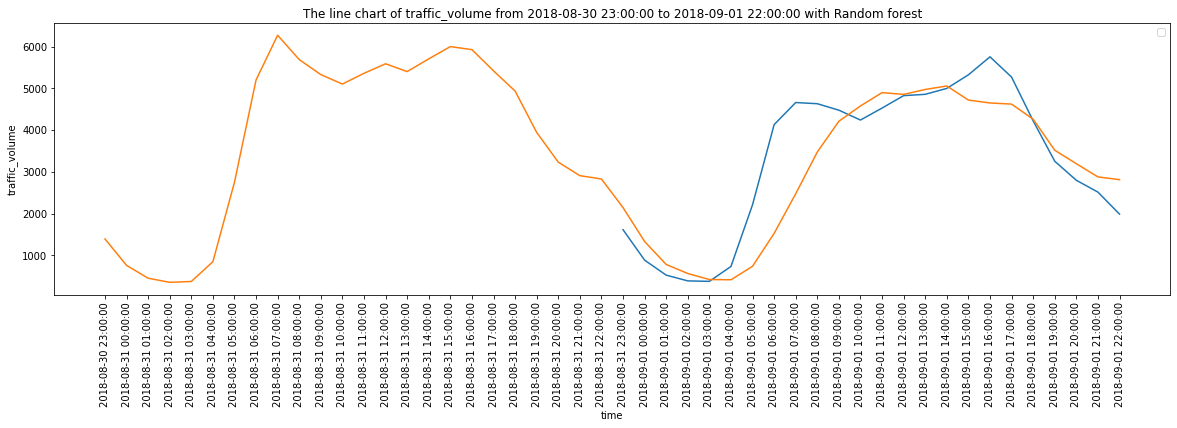

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(np.arange(24*1, 24*1+24, 1), predict[0])
plt.plot(actual[0][:24*1+24])
plt.xticks(np.arange(0, 24*1+24, 1), predict_df.iloc[:24*1+24].index, rotation='90')
plt.title('The line chart of traffic_volume from 2018-08-30 23:00:00 to 2018-09-01 22:00:00 with Random forest')
plt.xlabel('time')
plt.ylabel('traffic_volume')
plt.legend()
plt.show()